# KNN Project
## Detecting a rock or a mine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sonar.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<AxesSubplot:xlabel='Label', ylabel='Count'>

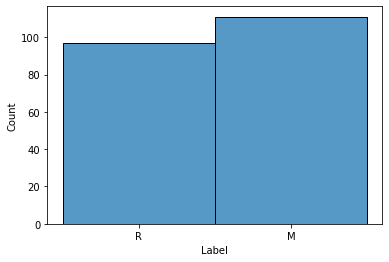

In [7]:
sns.histplot(data=df,x='Label')

In [8]:
def label(l):
    if l == 'R':
        return 0
    return 1
df['Label'] = np.vectorize(label)(df['Label'])

In [10]:
X = df.drop('Label',axis=1)
Y = df['Label']

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.1,random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
errors = []
trainerror = []
for k in range(1,30):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(xtrain,ytrain)
    err2 = accuracy_score(ytrain,model.predict(xtrain))
    err = accuracy_score(ytest,model.predict(xtest))
    errors.append(err)
    trainerror.append(err2)

## Train and test accuracy for different K values.

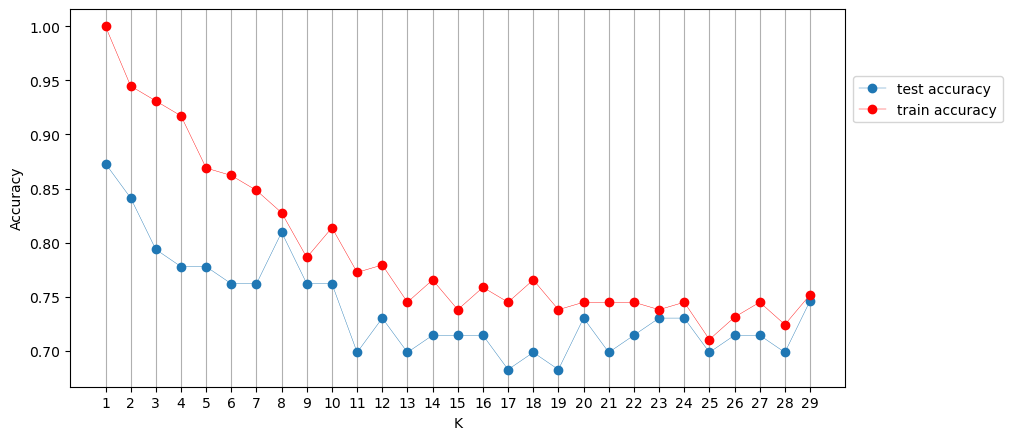

In [33]:
plt.figure(figsize=(10,5),dpi=100)
plt.grid(True,axis='x')
plt.plot(np.arange(1,30),errors,'o-',lw=0.3,label='test accuracy')
plt.plot(np.arange(1,30),trainerror,'ro-',lw=0.3,label='train accuracy')
plt.xticks(np.arange(1,30))
plt.legend(loc=(1.01,0.7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

### Final classification report

In [40]:
from sklearn.metrics import classification_report
model = KNeighborsClassifier(n_neighbors=1)
model.fit(xtrain,ytrain)
print(classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

